{'x': 0.32522804334022437, 'y': 0.30119452565126803}
box: [3.0, 0.6078112499999996, 0.2117111036036036, 0.403125, 0.4144144144144144]
[(0.25984792208776636, 0.29720260612385385, 0.13637496427394843, 0.5661007598748347)]
coordinates: (0.25984792208776636, 0.29720260612385385, 0.13637496427394843, 0.5661007598748347)
0.25984792208776636
0.29720260612385385
0.13637496427394843
0.5661007598748347


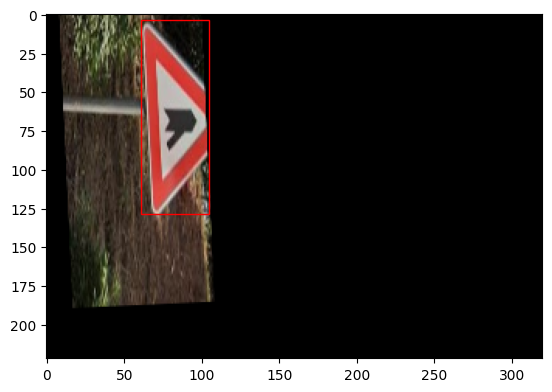

In [7]:
#SHOW AN EXAMPLE OF AUGMENTATION
import albumentations as A
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Define an interval for translation
max_interval = 0.4
exclusion_interval = 0.3

# Function to generate a random translation value within the interval while excluding specific values
def random_translation(max_translate_interval, ex_interval):
    while True:
        x_translation = random.uniform(-max_translate_interval, max_translate_interval)  # Generate random x translation
        y_translation = random.uniform(-max_translate_interval, max_translate_interval)  # Generate random y translation
        if x_translation >= ex_interval and y_translation >= ex_interval:
            return {"x": x_translation, "y": y_translation}
        elif x_translation <= -ex_interval and y_translation <= -ex_interval:
            return {"x": x_translation, "y": y_translation}

value = random_translation(max_interval,exclusion_interval)
print(value)

transform = A.Compose([
    A.Affine(rotate=(-90, 90), translate_percent=random_translation(max_interval,exclusion_interval), scale=(0.3,1), p=1),
], bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))

#Images
chinese_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_chinese'
ita_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_ita'
all_PATH= [chinese_PATH, ita_PATH]
class_labels = ['sign']

image_PATH = random.choice(all_PATH)
# List all image filenames (without extensions)
image_filenames = [filename[:-4] for filename in os.listdir(image_PATH) if filename.endswith('.jpg')]
image_filename = random.choice(image_filenames)

image_path = os.path.join(image_PATH, image_filename + '.jpg')
information_path = os.path.join(image_PATH, image_filename + '.txt')

new_image = cv2.imread(image_path)
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Get box information in YOLO format
file_to_read = open(information_path, 'r')
line_in_file = file_to_read.readline()
box = [float(string) for string in line_in_file.strip().split(' ')]
print('box:', box)
bboxes = [[box[1], box[2], box[3], box[4]]]  # Extract x_center, y_center, width, and height
class_label = ['sign']
cclass_label = [class_label]

transformed = transform(image=new_image, bboxes=bboxes, class_labels=cclass_label)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

plt.imshow(transformed_image)
print(transformed_bboxes)

box_transform=[]

for coordinates in transformed_bboxes:
    print('coordinates:', coordinates)
    for number in coordinates:
        print(number)
        box_transform.append(number)

im = Image.fromarray(transformed_image)

#Adjust bounding boxes coordinates to make them larger
width_height_mult_factor = 1
center_mult_factor = 1

# Plot bounding boxes on the image
x, y, width, height = box_transform  # Extract box coordinates
# Scale box coordinates to image size
x *= im.width
y *= im.height
#Calculate final values
width *= im.width
final_x = round(x - width / 2)*center_mult_factor
final_width = width*width_height_mult_factor
height *= im.height
final_y = round(y - height / 2)*center_mult_factor
final_height = height*width_height_mult_factor
rect = plt.Rectangle((final_x, final_y), final_width, final_height, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

# Show the image with bounding boxes
plt.show()

In [1]:
# Used to create the augmented images based on how many we needed to get 2000 for each class
import albumentations as A
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

augmented_mandatory_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\augmented_mandatory_signs'
augmented_prohibition_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\augmented_prohibition_signs'
augmented_speedlimit_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\augmented_speedlimit_signs'
augmented_warning_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\augmented_warning_signs'
all_augmented_PATHS = [augmented_mandatory_PATH, augmented_warning_PATH, augmented_speedlimit_PATH, augmented_prohibition_PATH]
for path in all_augmented_PATHS:
    if not os.path.exists(path):
	    os.mkdir(path)

# How many to create
MANDATORY = 928
PROHIBITION = 851
SPEED_LIMIT = 502
WARNING = 185
to_generate = MANDATORY + PROHIBITION + SPEED_LIMIT + WARNING

# Define an interval for translation
max_interval = 0.3
exclusion_interval = 0.2

# Function to generate a random translation value within the interval while excluding specific values
def random_translation(max_translate_interval, ex_interval):
    while True:
        x_translation = random.uniform(-max_translate_interval, max_translate_interval)  # Generate random x translation
        y_translation = random.uniform(-max_translate_interval, max_translate_interval)  # Generate random y translation
        return {"x": x_translation, "y": y_translation}

#Images
chinese_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_chinese'
ita_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\elaborated_data_ita'
all_PATH= [chinese_PATH, ita_PATH]
class_labels = ['sign']
# List all image filenames (without extensions)
image_filenames=[]
for image_PATH in all_PATH:
    prov_names = [filename[:-4] for filename in os.listdir(image_PATH) if filename.endswith('.jpg')]
    image_composed = [(image_PATH + '\\' + filename) for filename in prov_names]
    image_filenames += image_composed
random.shuffle(image_filenames)

while to_generate > 0:
    for image_filename in image_filenames:
        current_save_PATH=''
        image_path = image_filename + '.jpg'
        information_path = image_filename + '.txt'
        print(image_filename)

        # Get box information in YOLO format
        file_to_read = open(information_path, 'r')
        line_in_file = file_to_read.readline()
        box = [float(string) for string in line_in_file.strip().split(' ')]
        save_code = int(box[0])
        if save_code==0:
            if MANDATORY==0:
                continue
            else:
                MANDATORY -= 1
                current_save_PATH=augmented_mandatory_PATH
        elif save_code==1:
            if PROHIBITION==0:
                continue
            else:
                PROHIBITION -= 1
                current_save_PATH=augmented_prohibition_PATH
        elif save_code==2:
            if SPEED_LIMIT==0:
                continue
            else:
                SPEED_LIMIT -= 1
                current_save_PATH=augmented_speedlimit_PATH
        elif save_code==3:
            if WARNING==0:
                continue
            else:
                WARNING -= 1
                current_save_PATH=augmented_warning_PATH
        bboxes = [[box[1], box[2], box[3], box[4]]]  # Extract x_center, y_center, width, and height
        print(bboxes)
        class_label = ['sign']
        cclass_label = [class_label]

        new_image = cv2.imread(image_path)
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

        transform = A.Compose([
        A.Affine(scale=(0.3,0.8), rotate=(-60, 60), translate_percent=random_translation(max_interval,exclusion_interval), p=1),
        ], bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))
        transformed = transform(image=new_image, bboxes=bboxes, class_labels=cclass_label)

        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']

        box_transform=[]

        for coordinates in transformed_bboxes:
            for number in coordinates:
                box_transform.append(number)


        im = Image.fromarray(transformed_image)
        x, y, width, height = box_transform
        final_line = "%d %f %f %f %f" % (save_code, x, y, width, height)

        im.save(os.path.join(current_save_PATH, str(to_generate) + '.jpg')) #SAVES IT AS JPG
        with open(os.path.join(current_save_PATH, str(to_generate) + '.txt'), 'w') as f:
                f.write(final_line)
        to_generate -= 1

C:\Users\marru\Documents\Magistrale\Secondo_Semestre\I_Systems\Project\final_datasets\elaborated_data_chinese\026_1_0030_1_j
[[0.522556, 0.458716, 0.443609, 0.568807]]
C:\Users\marru\Documents\Magistrale\Secondo_Semestre\I_Systems\Project\final_datasets\elaborated_data_ita\00308_1
[[0.41124275739645, 0.40625073863636363, 0.40828402366863903, 0.4034090909090909]]
C:\Users\marru\Documents\Magistrale\Secondo_Semestre\I_Systems\Project\final_datasets\elaborated_data_chinese\002_0033
[[0.52454, 0.506494, 0.742331, 0.74026]]
C:\Users\marru\Documents\Magistrale\Secondo_Semestre\I_Systems\Project\final_datasets\elaborated_data_chinese\043_0003_j
[[0.494318, 0.481707, 0.443182, 0.45122]]
C:\Users\marru\Documents\Magistrale\Secondo_Semestre\I_Systems\Project\final_datasets\elaborated_data_ita\01124_0
[[0.5000018624338626, 0.5125646231155779, 0.3333333333333333, 0.3417085427135678]]
C:\Users\marru\Documents\Magistrale\Secondo_Semestre\I_Systems\Project\final_datasets\elaborated_data_chinese\020_0